In [1]:
from mylib.utils.misc import plot_voxel_enhance
from mylib.dataloader import dataset
%matplotlib inline

In [2]:
clf_seg_dataset = dataset.ClfSegDataset(crop_size=32, subset=[0,3,4])

In [3]:
len(clf_seg_dataset)

12

In [4]:
x, (y, seg) = clf_seg_dataset[3]

In [5]:
print(x.shape)
print(y)
print(seg.shape)

(32, 32, 32, 1)
[True, False, False]
(32, 32, 32, 1)


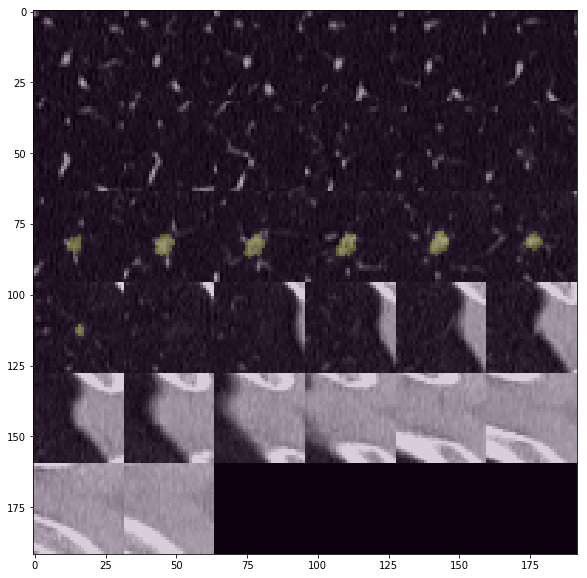

In [6]:
plot_voxel_enhance(x.squeeze(), seg.squeeze(), alpha=0.2)

# The interactive 3D nodule mesh plot

In [7]:
# from IPython.display import HTML
# from mylib.utils.plot3d import plotly_3d_scan_to_html

In [8]:
# plotly_3d_scan_to_html(seg.squeeze(),"tmp.html",step_size=3, zyx_range=((0,32),)*3)
# HTML("tmp.html")

# Create the models * 3D DenseSharp* and * 3D DenseNet*

In [9]:
import tensorflow as tf
import keras
print("TensorFlow version",tf.__version__)
print("Keras version",keras.__version__)

/home/jiancheng/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TensorFlow version 1.4.0
Keras version 2.1.5


Using TensorFlow backend.


In [10]:
from mylib.models.misc import set_gpu_usage
set_gpu_usage()

In [11]:
from mylib.models import densenet, densesharp

In [12]:
densenet_model = densenet.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x7f0b08f24f28>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x7f0ab4530268>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3}
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32, 32, 32, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 32, 32, 32, 3 896         lam

In [13]:
densesharp_model = densesharp.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x7f0ab4530620>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x7f0ab4530730>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32, 32, 32, 1 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv3d_28 (Conv3D)              (None, 32, 32,

In [14]:
densesharp_model = densesharp.get_compiled(k=32)

Model hyper-parameters: {'activation': <function <lambda> at 0x7f0ab4530620>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x7f0ab4530730>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 32, 32, 32, 1 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv3d_55 (Conv3D)              (None, 32, 32,

__________________________________________________________________________________________________
batch_normalization_75 (BatchNo (None, 8, 8, 8, 136) 544         concatenate_33[0][0]             
__________________________________________________________________________________________________
activation_75 (Activation)      (None, 8, 8, 8, 136) 0           batch_normalization_75[0][0]     
__________________________________________________________________________________________________
conv3d_76 (Conv3D)              (None, 8, 8, 8, 128) 17408       activation_75[0][0]              
__________________________________________________________________________________________________
batch_normalization_76 (BatchNo (None, 8, 8, 8, 128) 512         conv3d_76[0][0]                  
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 8, 8, 8, 128) 0           batch_normalization_76[0][0]     
__________